# Trabalho 

In [23]:
#Importando as Bibliotecas Necessária
import pandas as pd
import calendar
from datetime import datetime
import pyodbc
import os
import matplotlib.pyplot as plt

In [3]:
# Extraindo o diretório que estamos trabalhando
cwd = os.getcwd()
print('Diretorio atual '+cwd)
#Estabelecendo a pasta de dados que quero utilizar
dataPath=os.path.dirname(cwd)+'\\dados_vazao'
print('Diretório de dados '+dataPath)

Diretorio atual C:\Users\DaphneCalazans\OneDrive - altageotecnia.com\Área de Trabalho\Daphne\Pessoal\Mestrado\Python_EA\ENS410064-\2024\notebook
Diretório de dados C:\Users\DaphneCalazans\OneDrive - altageotecnia.com\Área de Trabalho\Daphne\Pessoal\Mestrado\Python_EA\ENS410064-\2024\dados_vazao


In [4]:
df = pd.read_csv(dataPath+'\\87317030_Vazoes_treated.csv', sep=';', decimal=',')
df

,EstacaoCodigo,NivelConsistencia,Data,Hora,MediaDiaria,MetodoObtencaoVazoes,Maxima,Minima,Media,DiaMaxima,...,Vazao22Status,Vazao23Status,Vazao24Status,Vazao25Status,Vazao26Status,Vazao27Status,Vazao28Status,Vazao29Status,Vazao30Status,Vazao31Status
0,87317030,1,01/03/2024,NaN,1,1,39.1141,9.5702,16.1880,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,87317030,1,01/02/2024,NaN,1,1,30.3725,11.2747,16.9002,26.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,87317030,1,01/01/2024,NaN,1,1,NaN,NaN,24.6000,NaN,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,87317030,1,01/12/2023,NaN,1,1,54.8488,14.5781,26.8175,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,87317030,1,01/11/2023,NaN,1,1,333.8879,14.1146,66.3164,18.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,87317030,2,01/09/1981,NaN,1,1,92.7816,4.9207,24.9858,24.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
500,87317030,2,01/08/1981,NaN,1,1,11.1144,2.3129,4.3761,28.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
501,87317030,2,01/07/1981,NaN,1,1,73.9579,3.0714,11.5237,21.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
502,87317030,2,01/06/1981,NaN,1,1,493.4988,3.4920,38.4619,7.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN


In [8]:
#Filtrando apenas as colunas de interesse
lista_dados_vazoes = ['Data','Vazao01', 'Vazao02',
       'Vazao03', 'Vazao04', 'Vazao05', 'Vazao06', 'Vazao07', 'Vazao08',
       'Vazao09', 'Vazao10', 'Vazao11', 'Vazao12', 'Vazao13', 'Vazao14',
       'Vazao15', 'Vazao16', 'Vazao17', 'Vazao18', 'Vazao19', 'Vazao20',
       'Vazao21', 'Vazao22', 'Vazao23', 'Vazao24', 'Vazao25', 'Vazao26',
       'Vazao27', 'Vazao28', 'Vazao29', 'Vazao30', 'Vazao31', 'Vazao01Status',
       'EstacaoCodigo','NivelConsistencia']
lista_dados_vazoes

['Data',
 'Vazao01',
 'Vazao02',
 'Vazao03',
 'Vazao04',
 'Vazao05',
 'Vazao06',
 'Vazao07',
 'Vazao08',
 'Vazao09',
 'Vazao10',
 'Vazao11',
 'Vazao12',
 'Vazao13',
 'Vazao14',
 'Vazao15',
 'Vazao16',
 'Vazao17',
 'Vazao18',
 'Vazao19',
 'Vazao20',
 'Vazao21',
 'Vazao22',
 'Vazao23',
 'Vazao24',
 'Vazao25',
 'Vazao26',
 'Vazao27',
 'Vazao28',
 'Vazao29',
 'Vazao30',
 'Vazao31',
 'Vazao01Status',
 'EstacaoCodigo',
 'NivelConsistencia']

In [9]:
#Convertendo formato do arquivo de vazão

def convert_table_vazao(df_table_vazao):
    print('...convertendo formato')
    df_table_vazao['Data'] = pd.to_datetime(df_table_vazao['Data'], format='%d/%m/%Y')    
    df_table_vazao = df_table_vazao[lista_dados_vazoes]
    
    list_vazao = []
    list_data = []
    list_estacao = []
    list_consistencia = []
    
    for n in range(0,len(df_table_vazao)):

        year_info=df_table_vazao['Data'][n].year
        month_info=df_table_vazao['Data'][n].month   

        for day in range(0,calendar.monthrange(year_info, month_info)[1]):
                number = day +1
                if number <10:
                    name_col_vazao = 'Vazao0'+str(number)
                else:
                    name_col_vazao = 'Vazao'+str(number)
                    
                estacao = df_table_vazao.iloc[[n]]['EstacaoCodigo']
                vazao = df_table_vazao.iloc[[n]][name_col_vazao]
                consis = df_table_vazao.iloc[[n]]['NivelConsistencia']
                data=datetime(year_info, month_info, day+1)
                
                list_estacao.append(estacao.values[0])
                list_vazao.append(vazao.values[0])
                list_consistencia.append(consis.values[0])
                list_data.append(data)

    Tabela_Final=pd.DataFrame(list_data, columns=['Data'])
    Tabela_Final['EstacaoCodigo'] = list_estacao
    Tabela_Final['Vazao'] = list_vazao
    Tabela_Final['NivelConsistencia'] = list_consistencia
    Tabela_reorder=Tabela_Final.sort_values(by=['Data']).reset_index() 
    
    return Tabela_reorder

In [30]:
#Armazenando os resultados
df_corrigido=convert_table_vazao(df)
df_corrigido

...convertendo formato


,index,Data,EstacaoCodigo,Vazao,NivelConsistencia
0,15308,1981-05-01,87317030,NaN,2
1,15309,1981-05-02,87317030,NaN,2
2,15310,1981-05-03,87317030,NaN,2
3,15311,1981-05-04,87317030,NaN,2
4,15312,1981-05-05,87317030,NaN,2
...,...,...,...,...,...
15334,26,2024-03-27,87317030,10.4304,1
15335,27,2024-03-28,87317030,9.5702,1
15336,28,2024-03-29,87317030,26.3939,1
15337,29,2024-03-30,87317030,14.7171,1


In [32]:
df_corrigido = df_corrigido.dropna(subset=['Vazao'])
df_corrigido

,index,Data,EstacaoCodigo,Vazao,NivelConsistencia
6,15314,1981-05-07,87317030,4.4166,2
7,15315,1981-05-08,87317030,3.9404,2
8,15316,1981-05-09,87317030,3.4920,2
9,15317,1981-05-10,87317030,3.0714,2
10,15318,1981-05-11,87317030,2.6784,2
...,...,...,...,...,...
15334,26,2024-03-27,87317030,10.4304,1
15335,27,2024-03-28,87317030,9.5702,1
15336,28,2024-03-29,87317030,26.3939,1
15337,29,2024-03-30,87317030,14.7171,1


In [33]:
# Salva o DataFrame em um arquivo CSV
df_corrigido.to_csv('dados_vazao_reorganizados.csv')

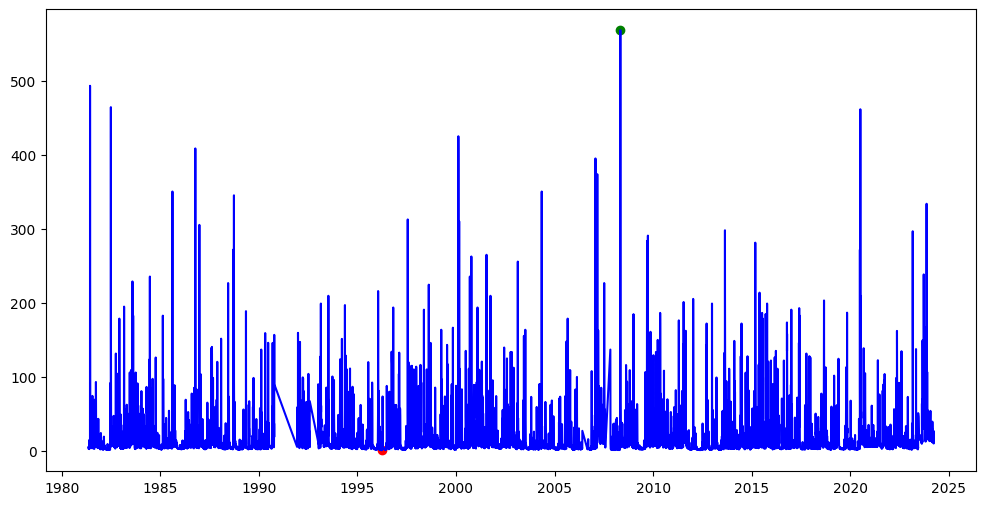

In [34]:
# Criar o lineplot
plt.figure(figsize=(12, 6))
plt.plot(df_corrigido['Data'], df_corrigido['Vazao'], label='Vazão', color='blue')

# Adicionar manchas para os valores mínimos e máximos
min_vazao = df_corrigido['Vazao'].min()
max_vazao = df_corrigido['Vazao'].max()
plt.scatter(df_corrigido['Data'][df_corrigido['Vazao'] == min_vazao], min_vazao, color='red', label='Mínimo')
plt.scatter(df_corrigido['Data'][df_corrigido['Vazao'] == max_vazao], max_vazao, color='green', label='Máximo')




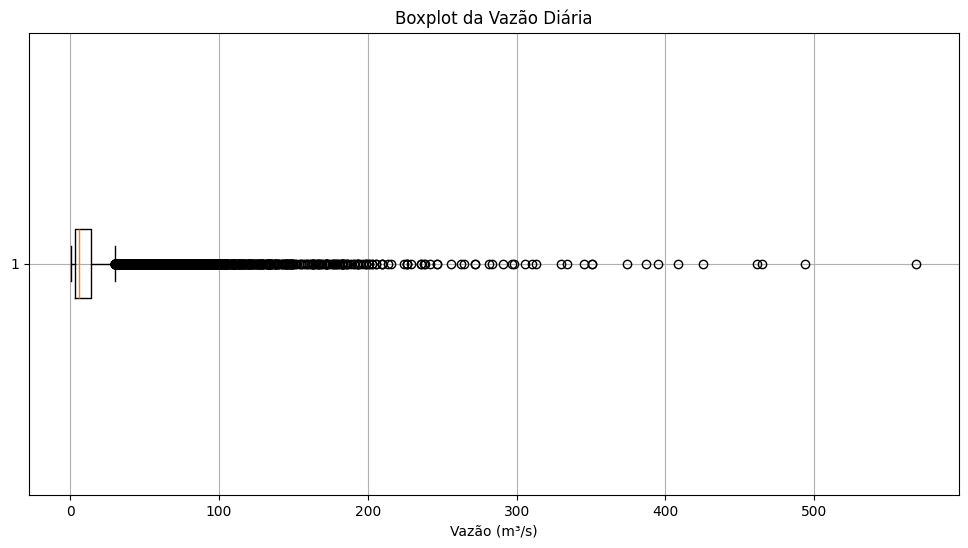

In [35]:
# Boxplot da série toda
plt.figure(figsize=(12, 6))
plt.boxplot(df_corrigido['Vazao'], vert=False)
plt.title('Boxplot da Vazão Diária')
plt.xlabel('Vazão (m³/s)')
plt.grid()
plt.show()